<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt


%matplotlib inline

In [ ]:
sns.set.context('poster')
sns.sedt(rc={'figure.figsize': (10,6)})
sns.set_style('whitegrid')

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV

data = pd.read_csv("C:/Users/victo/Documents/Institute_of_Data/DATA/Sacramento_transactions.csv")

In [3]:
data.shape

(985, 12)

In [4]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
street,985,981,1223 LAMBERTON CIR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,985,39,SACRAMENTO,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,985.0,NaN,NaN,NaN,95750.697462,85.176072,95603.0,95660.0,95762.0,95828.0,95864.0
state,985,1,CA,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,985.0,NaN,NaN,NaN,2.911675,1.307932,0.0,2.0,3.0,4.0,8.0
baths,985.0,NaN,NaN,NaN,1.77665,0.895371,0.0,1.0,2.0,2.0,5.0
sq__ft,985.0,NaN,NaN,NaN,1314.916751,853.048243,0.0,952.0,1304.0,1718.0,5822.0
type,985,4,Residential,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_date,985,5,Mon May 19 00:00:00 EDT 2008,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,985.0,NaN,NaN,NaN,234144.263959,138365.839085,1551.0,145000.0,213750.0,300000.0,884790.0


In [7]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
#zip should be categorical value, should not ne int64 in this case

data['zip'] = data['zip'].astype(str)


In [10]:
type('zip')

str

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [ ]:
#beds, baths and sq_ft - all have 0 for min values ----- doesnt make sense

In [12]:
data[(data['beds'] == 0) | (data['baths'] == 0) | (data['sq__ft'] == 0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [13]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


<AxesSubplot:>

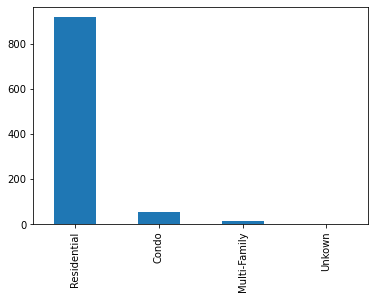

In [14]:
data['type'].value_counts().plot(kind='bar')

In [31]:
data.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [32]:
data[data['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183,234144.263959


In [33]:
data['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [31]:
#data.loc[data['beds'] == 0, 'type']

73     Residential
89     Residential
100    Residential
121    Residential
126    Residential
          ...     
901          Condo
917    Residential
934          Condo
947    Residential
970    Residential
Name: type, Length: 108, dtype: object

In [ ]:
# Create another type which have 0 beds, baths, sqft (answer)
#data.loc[data['beds'] == 0, 'type'] = 'Plot'

In [34]:
# Create another type which have 0 beds, baths, sqft
data.loc[(data['beds'] == 0) | (data['baths'] == 0) | (data['sq__ft'] == 0), 'type']


73     Residential
89     Residential
100    Residential
121    Residential
126    Residential
          ...     
934          Condo
947    Residential
966          Condo
970    Residential
973    Residential
Name: type, Length: 171, dtype: object

In [35]:
data.loc[(data['beds'] == 0) | (data['baths'] == 0) | (data['sq__ft'] == 0), 'type'] = 'Plot'

In [36]:
data.loc[(data['beds'] == 0) | (data['baths'] == 0) | (data['sq__ft'] == 0), 'type']

73     Plot
89     Plot
100    Plot
121    Plot
126    Plot
       ... 
934    Plot
947    Plot
966    Plot
970    Plot
973    Plot
Name: type, Length: 171, dtype: object

In [37]:
data.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Plot'], dtype=object)

<AxesSubplot:>

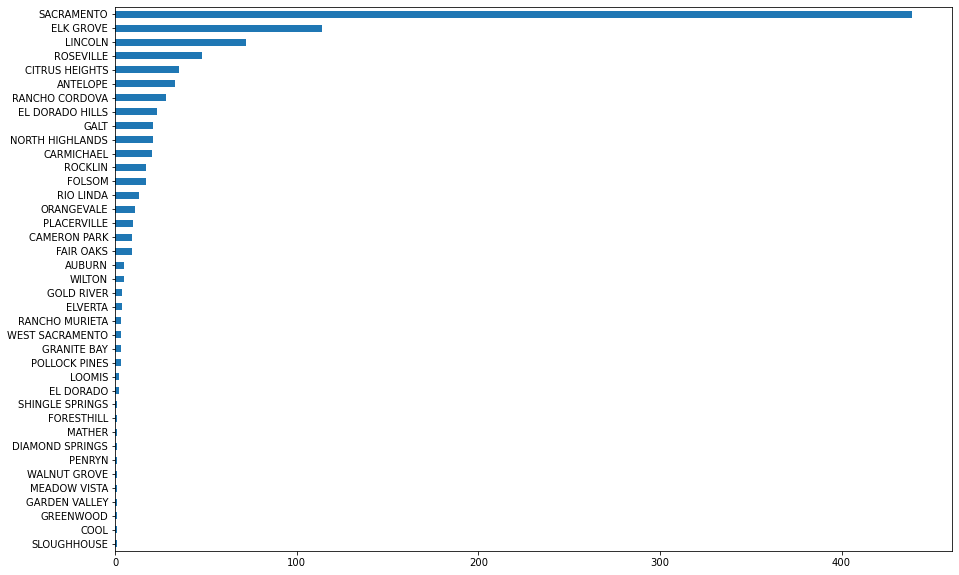

In [18]:
data.city.value_counts().sort_values().plot(kind='barh', figsize=(15,10))

<AxesSubplot:>

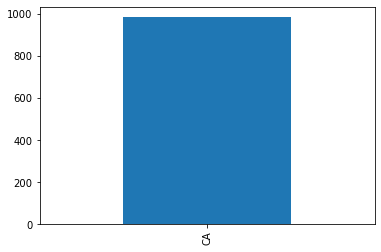

In [19]:
data.state.value_counts().plot(kind='bar')  #theres only one state

In [20]:
data

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 2. Predict Price

We are going to predict `price` from available information.

In [21]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### 2.1 What is the Target Variable? Why?

In [0]:
# ANSWER

#price is target variable

#### 2.2 List all possible variables which might be Predictor variable.

In [0]:
# ANSWER

#bed, baths, sq__ft, type

In [22]:
#Target variable
y = data['price']

In [23]:
#Predictor Variable
x = data['beds']

<AxesSubplot:xlabel='beds', ylabel='price'>

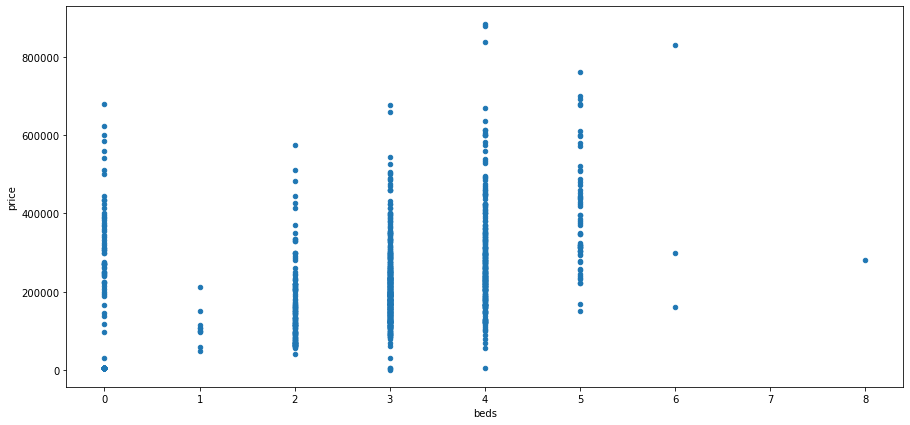

In [18]:
data.plot(x = 'beds', y = 'price', kind='scatter', figsize =(15,7))

<AxesSubplot:xlabel='baths', ylabel='price'>

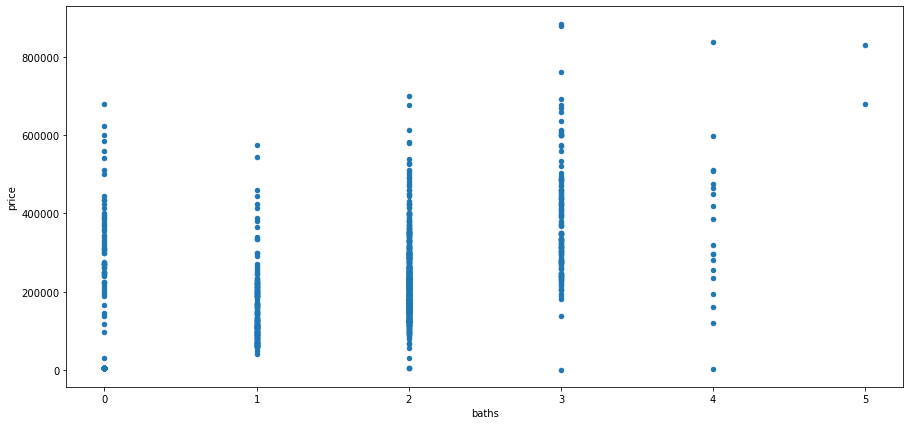

In [19]:
data.plot(x = 'baths', y = 'price', kind='scatter', figsize=(15, 7))

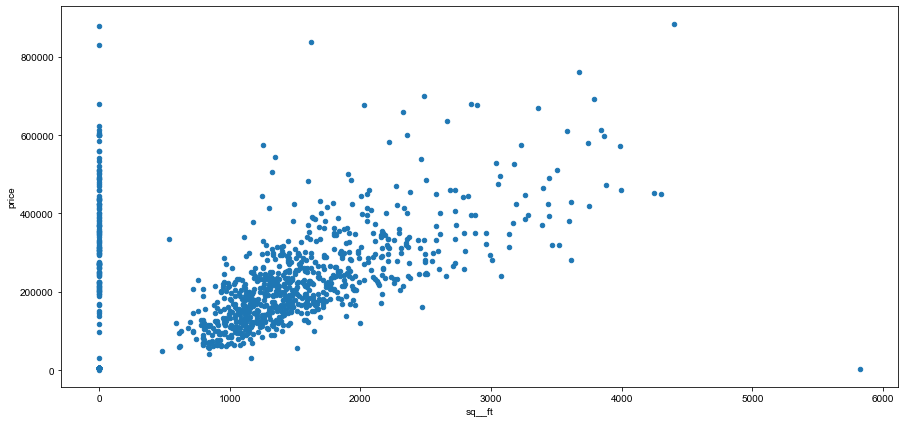

In [20]:
data.plot(x = 'sq__ft', y = 'price', kind='scatter', figsize=(15, 7))

sns.set_style('whitegrid')

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [33]:
# ANSWER
data.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [ ]:
#ANSWER
#SQFT has strong relationship with beds, baths

In [ ]:
#theres more variation in sq_ft (they are floats) hence its a better predictor compare to beds/baths

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [21]:
# ANSWER
#find mean of price
data['price'].mean()

234144.26395939087

In [22]:
data['y_hat'] = data['price'].mean()

In [23]:
data['y_hat']

0      234144.263959
1      234144.263959
2      234144.263959
3      234144.263959
4      234144.263959
           ...      
980    234144.263959
981    234144.263959
982    234144.263959
983    234144.263959
984    234144.263959
Name: y_hat, Length: 985, dtype: float64

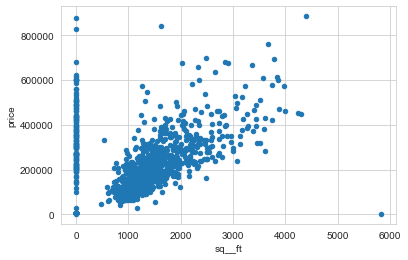

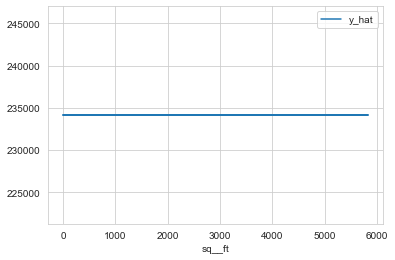

In [24]:
data.plot(x = 'sq__ft', y = 'price', kind='scatter')   #how to combine both plots???? is it possible??
data.plot(x = 'sq__ft', y = 'y_hat')

plt.show()

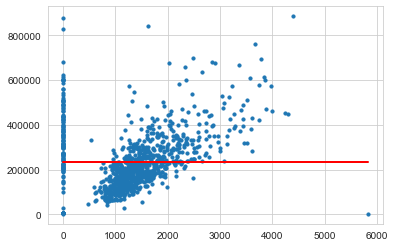

In [26]:
fig, ax = plt.subplots()   #how do i increase plotsize???

ax.scatter('sq__ft', 'price', data=data, s=10)
ax.plot('sq__ft', 'y_hat', data=data, color='r')
plt.show()

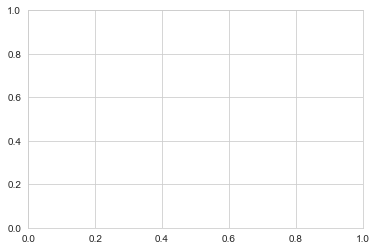

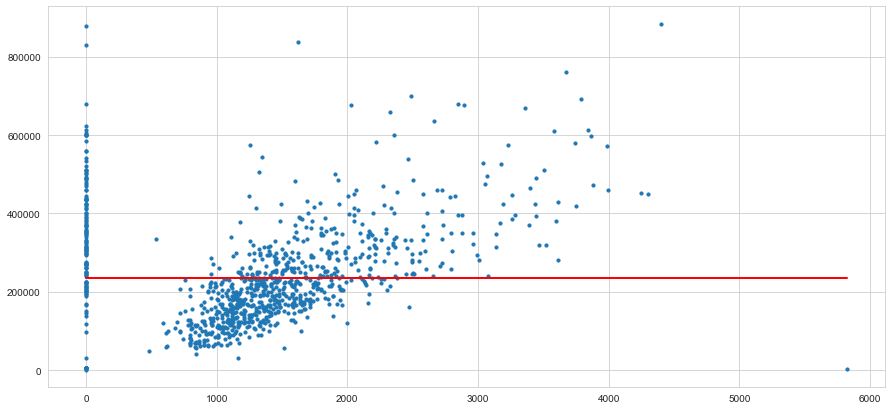

In [30]:
fig, ax = plt.subplots()   

fig = plt.figure(figsize=(15,7))
ax = plt.gca()

ax.scatter('sq__ft', 'price', data=data, s=10)
ax.plot('sq__ft', 'y_hat', data=data, color='r')
plt.show()

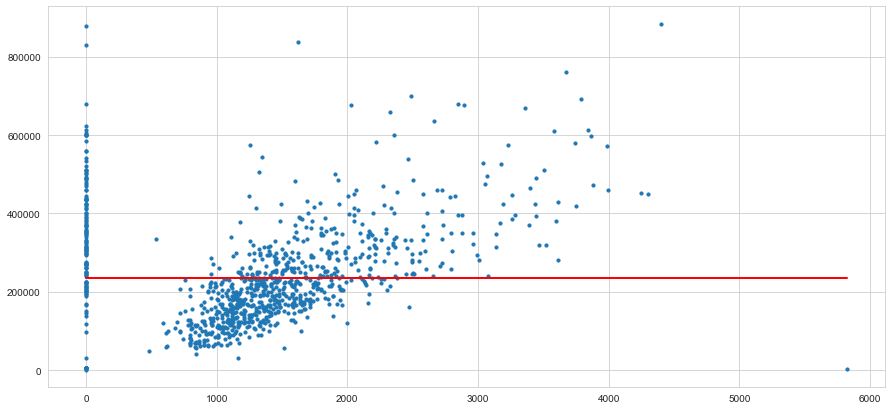

In [38]:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()

ax.scatter('sq__ft', 'price', data=data, s=10)
ax.plot('sq__ft', 'y_hat', data=data, color='r')
plt.show()

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [75]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res

103452.16956891476

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [39]:
# ANSWER
X = data['sq__ft']
Y = data['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [40]:
# ANSWER

x_mean = X.mean()
y_mean = Y.mean()

n = np.sum((Y - y_mean) * (X - x_mean)) 
d = np.sum(np.square(X - x_mean))

beta_1 = n/d

beta_1

54.158639688530755

In [41]:
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [42]:
beta_1 = calculate_beta_1(X, Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [44]:
# ANSWER

beta_0 = y_mean - beta_1*x_mean
beta_0

162930.16140699777

In [46]:
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [47]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [48]:
# ANSWER

Yhat = beta_0 + beta_1 * X
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

In [49]:
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [50]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [51]:
# ANSWER

res = Y - Yhat
res

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

In [52]:
abs(res)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

In [53]:
abs(res).mean()   #any prediction that you made is off by "95860", ideally you want residual to be as low as possible
                  #compare this value to the previous calculation res = abs(data['price'] - data['y_hat']).mean()

95860.14770214104

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [54]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = Y.mean()
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [ ]:
#def calculate_total_sum_of_square(Y):
    #Ybar = np.mean(Y)
    #SStot = np.square(Y - Ybar)
    #SStot = np.sum(SStot)
    #return SStot

In [55]:
calculate_total_sum_of_square(Y)

18838783738865.37

In [56]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [57]:
calculate_r_square(Y, np.mean(Y))

0.0

In [58]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

In [ ]:
you want higher R square value, lower residuals value

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [0]:
# ANSWER

In [59]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

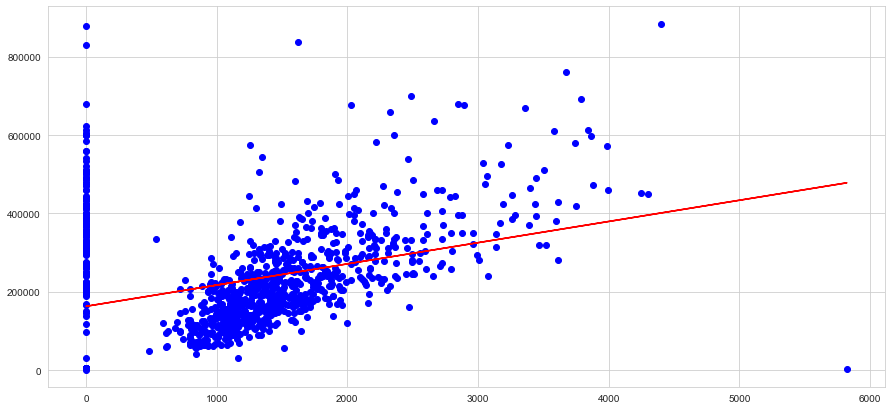

In [60]:
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [0]:
# ANSWER

??????????

In [66]:
data['Yhat'] = Yhat

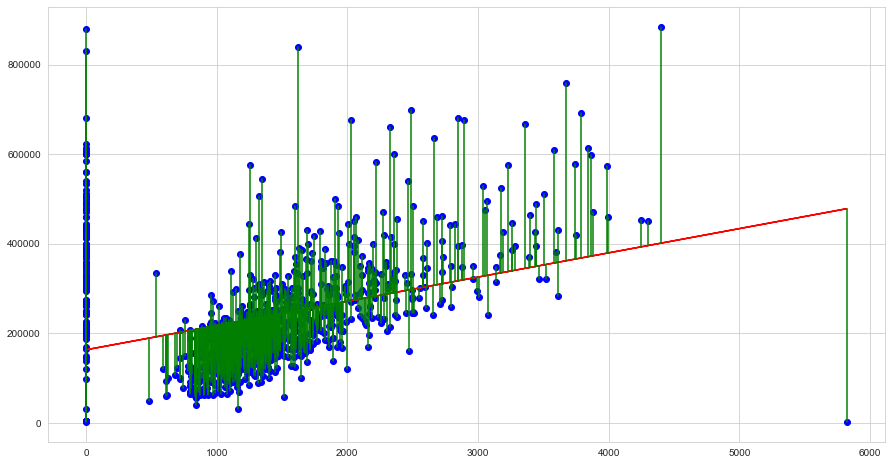

In [67]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [62]:
# ANSWER
new_sqft = 1204

In [64]:
Ypred= beta_0 + beta_1 * new_sqft

Ypred

228137.1635919888



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



